In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
import datetime as dt

In [3]:
#combinae datasets
df1 = pd.read_csv("repo/final-projects-stackoverflow-analysis-group/data/datasets/2016__2024.csv")
df2 = pd.read_csv("repo/final-projects-stackoverflow-analysis-group/data/datasets/2010_2016.csv")
df = pd.concat([df1, df2])
df.to_csv("full_dataset.csv", index=False)


/var/folders/_8/qyfw45yd7gbg3snksb6ws_380000gn/T/ipykernel_97733/705209513.py:3: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("repo/final-projects-stackoverflow-analysis-group/data/datasets/2010_2016.csv")


In [4]:

print("Dataset overview:")
print(df.head())
print(f"Shape: {df.shape}")
print(df.info())

Dataset overview:
         Id  AcceptedAnswerId  AnswerCount  \
0  34686889          34687306            2   
1  35040060                 0            1   
2  35086029                 0            2   
3  34916857          34917537            3   
4  35078559          35081140            1   

                                                Body ClosedDate  CommentCount  \
0  <p>I'd like to use regex to see if a number do...        NaN             6   
1  <p>I am trying to read the depth buffer in Ope...        NaN             0   
2  <p>I just downloaded birt runtime birt-runtime...        NaN             0   
3  <p>I need to automate the below code snippet u...        NaN             2   
4  <p>All right, folks! Here is the basic gist of...        NaN             1   

  CommunityOwnedDate             CreationDate  FavoriteCount  \
0                NaN  2016-01-08 22:04:16.060              0   
1                NaN  2016-01-27 14:29:38.003              0   
2                NaN  2016

In [5]:
df['CreationDate'] = pd.to_datetime(df['CreationDate'], format='ISO8601')
df['Year'] = df['CreationDate'].dt.year
df['Month'] = df['CreationDate'].dt.month
df['YearMonth'] = df['CreationDate'].dt.to_period('M')
df.head()

,Id,AcceptedAnswerId,AnswerCount,Body,ClosedDate,CommentCount,CommunityOwnedDate,CreationDate,FavoriteCount,LastActivityDate,...,PostTypeId,Score,Tags,Title,ViewCount,PostMonth,rn,Year,Month,YearMonth
0,34686889,34687306,2,<p>I'd like to use regex to see if a number do...,NaN,6,NaN,2016-01-08 22:04:16.060,0,2016-01-09 17:13:31.607,...,1,3,|regex|xsd|,XSD pattern that accept 5 number which does no...,546,2016-01,1,2016,1,2016-01
1,35040060,0,1,<p>I am trying to read the depth buffer in Ope...,NaN,0,NaN,2016-01-27 14:29:38.003,0,2016-02-18 08:32:51.017,...,1,1,|android|opengl-es|depth|,Read the depth buffer of OpenGL ES on Android,2060,2016-01,2,2016,1,2016-01
2,35086029,0,2,<p>I just downloaded birt runtime birt-runtime...,NaN,0,NaN,2016-01-29 13:43:15.117,0,2020-10-10 05:20:25.437,...,1,1,|birt|,does birt runtime 4.5 need java 1.7?,1452,2016-01,3,2016,1,2016-01
3,34916857,34917537,3,<p>I need to automate the below code snippet u...,NaN,2,NaN,2016-01-21 06:31:58.237,0,2016-01-21 07:50:04.247,...,1,1,|java|loops|if-statement|for-loop|,Automate Logic using Loops?,47,2016-01,4,2016,1,2016-01
4,35078559,35081140,1,"<p>All right, folks! Here is the basic gist of...",NaN,1,NaN,2016-01-29 06:54:42.887,0,2016-02-11 02:40:01.760,...,1,2,|javascript|html|css|cookies|cursor|,Javascript change CSS page with javascript but...,691,2016-01,5,2016,1,2016-01


In [6]:
df[(df['Tags'].notna())]

,Id,AcceptedAnswerId,AnswerCount,Body,ClosedDate,CommentCount,CommunityOwnedDate,CreationDate,FavoriteCount,LastActivityDate,...,PostTypeId,Score,Tags,Title,ViewCount,PostMonth,rn,Year,Month,YearMonth
0,34686889,34687306,2,<p>I'd like to use regex to see if a number do...,NaN,6,NaN,2016-01-08 22:04:16.060,0,2016-01-09 17:13:31.607,...,1,3,|regex|xsd|,XSD pattern that accept 5 number which does no...,546,2016-01,1,2016,1,2016-01
1,35040060,0,1,<p>I am trying to read the depth buffer in Ope...,NaN,0,NaN,2016-01-27 14:29:38.003,0,2016-02-18 08:32:51.017,...,1,1,|android|opengl-es|depth|,Read the depth buffer of OpenGL ES on Android,2060,2016-01,2,2016,1,2016-01
2,35086029,0,2,<p>I just downloaded birt runtime birt-runtime...,NaN,0,NaN,2016-01-29 13:43:15.117,0,2020-10-10 05:20:25.437,...,1,1,|birt|,does birt runtime 4.5 need java 1.7?,1452,2016-01,3,2016,1,2016-01
3,34916857,34917537,3,<p>I need to automate the below code snippet u...,NaN,2,NaN,2016-01-21 06:31:58.237,0,2016-01-21 07:50:04.247,...,1,1,|java|loops|if-statement|for-loop|,Automate Logic using Loops?,47,2016-01,4,2016,1,2016-01
4,35078559,35081140,1,"<p>All right, folks! Here is the basic gist of...",NaN,1,NaN,2016-01-29 06:54:42.887,0,2016-02-11 02:40:01.760,...,1,2,|javascript|html|css|cookies|cursor|,Javascript change CSS page with javascript but...,691,2016-01,5,2016,1,2016-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35995,34136801,34187804,1,<p>We're trying to implement subscriptions wit...,NaN,0,NaN,2015-12-07 15:09:33.273,0,2016-01-19 18:23:44.413,...,1,2,|fiware|fiware-orion|,Orion Context Broker v2 subscription issue,354,2015-12,496,2015,12,2015-12
35996,34318423,34321727,1,<pre><code>.method public static void Test&lt...,NaN,2,NaN,2015-12-16 17:30:25.777,0,2015-12-19 19:47:09.493,...,1,7,|.net|clr|nullreferenceexception|cil|il|,CIL unbox_any instruction - strange behavior,370,2015-12,497,2015,12,2015-12
35997,34406925,34419296,1,"<p>For my current project, I am required to ta...",NaN,0,NaN,2015-12-22 01:01:15.247,0,2015-12-22 15:33:29.170,...,1,-1,|c#|pdf|itext|,Shrinking the contents of a pdf page,1239,2015-12,498,2015,12,2015-12
35998,34546212,34546278,3,<p>I try to write a regular expression to matc...,NaN,2,NaN,2015-12-31 11:59:02.283,0,2015-12-31 12:40:56.660,...,1,2,|python|regex|,matching quoted strings and unquoted words,650,2015-12,499,2015,12,2015-12


In [7]:

print(f"CreationDate data type: {df['CreationDate'].dtype}")
if df['CreationDate'].dt.tz is not None:
    test_date = pd.to_datetime('2022-11-01').tz_localize(df['CreationDate'].dt.tz[0])
else:
    test_date = pd.to_datetime('2022-11-01')




CreationDate data type: datetime64[ns]
Posts after Nov, 2022: 8500
Posts before ChatGPT release: 77000
Posts after ChatGPT release: 8500


In [8]:
ai_tags = [
  'machine-learning', 'deep-learning', 'neural-network', 'artificial-intelligence', 
  'natural-language-processing', 'nlp', 'conv-neural-network', 'lstm', 
  'tensorflow', 'keras', 'pytorch', 'scikit-learn', 'computer-vision',
  'object-detection', 'face-recognition', 'face-detection', 'sentiment-analysis',
  'chatgpt', 'claude', 'gpt', 'llm', 'transformers', 'bert', 'rnn', 'cnn',
  'reinforcement-learning', 'supervised-learning', 'unsupervised-learning',
  'classification', 'regression', 'clustering', 'decision-tree', 'random-forest',
  'k-means', 'naive-bayes', 'svm', 'feature-selection', 'dimensionality-reduction',
  'word-embedding', 'word2vec', 'glove', 'fasttext', 'text-classification',
  'image-classification', 'object-detection-api', 'yolo', 'rcnn', 'fast-rcnn',
  'mask-rcnn', 'semantic-segmentation', 'instance-segmentation', 'transfer-learning',
  'fine-tuning', 'hyperparameter-tuning', 'activation-function', 'backpropagation',
  'gradient-descent', 'stochastic-gradient-descent', 'adam-optimizer', 'loss-function',
  'cross-entropy', 'mean-squared-error', 'precision-recall', 'f1-score', 'roc',
  'auc', 'confusion-matrix', 'overfitting', 'underfitting', 'regularization',
  'dropout', 'batch-normalization', 'data-augmentation', 'generative-adversarial-networks',
  'autoencoder', 'variational-autoencoder', 'self-supervised-learning',
  'semi-supervised-learning', 'few-shot-learning', 'zero-shot-learning',
  'one-shot-learning', 'meta-learning', 'multi-task-learning', 'ensemble-learning',
  'boosting', 'bagging', 'xgboost', 'lightgbm', 'catboost', 'adaboost',
  'gradient-boosting', 'time-series-forecasting', 'anomaly-detection',
  'recommendation-system', 'collaborative-filtering', 'content-based-filtering',
  'hybrid-recommendation', 'knowledge-graph', 'knowledge-representation',
  'ontology', 'semantic-web', 'reasoning', 'planning', 'search', 'a-star',
  'minimax', 'alpha-beta-pruning', 'monte-carlo-tree-search', 'genetic-algorithm',
  'evolutionary-algorithm', 'swarm-intelligence', 'particle-swarm-optimization',
  'ant-colony-optimization', 'fuzzy-logic', 'bayesian-network', 'markov-chain',
  'hidden-markov-model', 'conditional-random-field', 'crf', 'named-entity-recognition',
  'speech-recognition', 'speech-synthesis', 'text-to-speech', 'speech-to-text',
  'image-generation', 'text-generation', 'language-model', 'question-answering',
  'machine-translation', 'summarization', 'dialogue-system', 'chatbot',
  'information-retrieval', 'information-extraction', 'topic-modeling', 'lda',
  'word-sense-disambiguation', 'coreference-resolution', 'dependency-parsing',
  'constituency-parsing', 'part-of-speech-tagging', 'tokenization', 'stemming',
  'lemmatization', 'stop-words', 'tf-idf', 'bag-of-words', 'n-gram',
  'sequence-to-sequence', 'attention-mechanism', 'transformer', 'self-attention',
  'multi-head-attention', 'positional-encoding', 'beam-search', 'greedy-search',
  'teacher-forcing', 'curriculum-learning', 'contrastive-learning',
  'representation-learning', 'feature-learning', 'metric-learning',
  'siamese-network', 'triplet-loss', 'cosine-similarity', 'euclidean-distance',
  'manhattan-distance', 'mahalanobis-distance', 'jaccard-similarity',
  'pearson-correlation', 'spearman-correlation', 'kendall-tau',
  'mutual-information', 'information-gain', 'gini-index', 'entropy',
  'cross-validation', 'k-fold-cross-validation', 'leave-one-out-cross-validation',
  'stratified-sampling', 'data-preprocessing', 'feature-engineering',
  'feature-extraction', 'feature-transformation', 'normalization',
  'standardization', 'min-max-scaling', 'z-score-normalization',
  'principal-component-analysis', 'pca', 'singular-value-decomposition',
  'svd', 'linear-discriminant-analysis', 'lda', 'non-negative-matrix-factorization',
  'nmf', 't-sne', 'umap', 'isomap', 'locally-linear-embedding', 'lle',
  'spectral-embedding', 'manifold-learning', 'kernel-trick', 'radial-basis-function',
  'rbf', 'polynomial-kernel', 'linear-kernel', 'sigmoid-kernel',
  'chi-square-kernel', 'laplacian-kernel', 'cosine-kernel',
  'hamming-distance', 'levenshtein-distance', 'edit-distance',
  'jaro-winkler-distance', 'soundex', 'metaphone', 'phonetic-algorithm',
  'bloom-filter', 'locality-sensitive-hashing', 'lsh', 'approximate-nearest-neighbor',
  'ann', 'kd-tree', 'ball-tree', 'r-tree', 'quadtree', 'octree',
  'spatial-index', 'inverted-index', 'forward-index', 'posting-list',
  'term-frequency', 'document-frequency', 'inverse-document-frequency',
  'bm25', 'okapi-bm25', 'vector-space-model', 'boolean-retrieval-model',
  'probabilistic-retrieval-model', 'language-model-retrieval',
  'query-expansion', 'relevance-feedback', 'pseudo-relevance-feedback',
  'explicit-relevance-feedback', 'implicit-relevance-feedback',
  'click-through-rate', 'conversion-rate', 'bounce-rate', 'dwell-time',
  'user-satisfaction', 'user-engagement', 'user-experience', 'a-b-testing',
  'multivariate-testing', 'bandit-algorithm', 'thompson-sampling',
  'upper-confidence-bound', 'ucb', 'epsilon-greedy', 'explore-exploit',
  'multi-armed-bandit', 'contextual-bandit', 'online-learning',
  'incremental-learning', 'lifelong-learning', 'continual-learning',
  'catastrophic-forgetting', 'elastic-weight-consolidation', 'ewc',
  'progressive-neural-network', 'knowledge-distillation', 'model-compression',
  'quantization', 'pruning', 'sparsity', 'low-rank-approximation',
  'tensor-decomposition', 'cp-decomposition', 'tucker-decomposition',
  'tensor-train', 'tensor-ring', 'hierarchical-tensor', 'tensor-network',
  'mixed-precision-training', 'half-precision', 'single-precision',
  'double-precision', 'bfloat16', 'float16', 'float32', 'float64',
  'distributed-training', 'data-parallel', 'model-parallel',
  'pipeline-parallel', 'gradient-accumulation', 'gradient-checkpointing',
  'automatic-mixed-precision', 'amp', 'nvidia-apex', 'horovod',
  'parameter-server', 'all-reduce', 'ring-all-reduce', 'collective-communication',
  'mpi', 'nccl', 'gloo', 'openmpi', 'cuda', 'cudnn', 'cublas', 'cufft',
  'cusparse', 'curand', 'thrust', 'opencl', 'vulkan', 'metal', 'directml',
  'oneapi', 'dpcpp', 'sycl', 'rocm', 'hip', 'miopen', 'miopengemm',
  'tpu', 'vpu', 'dsp', 'fpga', 'asic', 'neuromorphic-computing',
  'quantum-computing', 'quantum-machine-learning', 'qml',
  'variational-quantum-eigensolver', 'vqe', 'quantum-approximate-optimization-algorithm',
  'qaoa', 'quantum-neural-network', 'qnn', 'quantum-kernel-method',
  'quantum-support-vector-machine', 'qsvm', 'quantum-k-means',
  'quantum-principal-component-analysis', 'qpca', 'quantum-boltzmann-machine',
  'qbm', 'quantum-generative-adversarial-network', 'qgan',
  'quantum-circuit-learning', 'qcl', 'quantum-transfer-learning',
  'quantum-reinforcement-learning', 'qrl', 'quantum-annealing',
  'adiabatic-quantum-computing', 'gate-based-quantum-computing',
  'measurement-based-quantum-computing', 'topological-quantum-computing',
  'quantum-error-correction', 'quantum-error-mitigation', 'qem',
  'quantum-noise', 'quantum-decoherence', 'quantum-gate', 'quantum-circuit',
  'quantum-state', 'quantum-measurement', 'quantum-teleportation',
  'quantum-entanglement', 'quantum-superposition', 'quantum-interference',
  'quantum-parallelism', 'quantum-speedup', 'quantum-advantage',
  'quantum-supremacy', 'quantum-volume', 'quantum-readiness',
  'quantum-safe-cryptography', 'post-quantum-cryptography', 'pqc',
  'lattice-based-cryptography', 'code-based-cryptography',
  'multivariate-cryptography', 'hash-based-cryptography',
  'isogeny-based-cryptography', 'quantum-key-distribution', 'qkd',
  'quantum-random-number-generator', 'qrng', 'quantum-secure-direct-communication',
  'qsdc', 'quantum-digital-signature', 'qds', 'quantum-money',
  'quantum-bitcoin', 'quantum-blockchain', 'quantum-internet',
  'quantum-network', 'quantum-repeater', 'quantum-memory',
  'quantum-sensor', 'quantum-metrology', 'quantum-imaging',
  'quantum-radar', 'quantum-lidar', 'quantum-navigation',
  'quantum-gravity', 'quantum-field-theory', 'quantum-mechanics',
  'quantum-information', 'quantum-computation', 'quantum-communication',
  'quantum-cryptography', 'quantum-simulation', 'quantum-chemistry',
  'quantum-biology', 'quantum-finance', 'quantum-optimization',
  'quantum-machine-intelligence', 'quantum-artificial-intelligence',
  'quantum-deep-learning', 'quantum-neural-network', 'quantum-convolutional-neural-network',
  'qcnn', 'quantum-recurrent-neural-network', 'qrnn',
  'quantum-transformer', 'quantum-attention', 'quantum-self-attention',
  'quantum-multi-head-attention', 'quantum-positional-encoding',
  'quantum-embedding', 'quantum-feature-map', 'quantum-kernel',
  'quantum-distance', 'quantum-similarity', 'quantum-clustering',
  'quantum-classification', 'quantum-regression', 'quantum-anomaly-detection',
  'quantum-recommendation-system', 'quantum-collaborative-filtering',
  'quantum-content-based-filtering', 'quantum-hybrid-recommendation',
  'quantum-knowledge-graph', 'quantum-knowledge-representation',
  'quantum-ontology', 'quantum-semantic-web', 'quantum-reasoning',
  'quantum-planning', 'quantum-search', 'quantum-a-star',
  'quantum-minimax', 'quantum-alpha-beta-pruning', 'quantum-monte-carlo-tree-search',
  'quantum-genetic-algorithm', 'quantum-evolutionary-algorithm',
  'quantum-swarm-intelligence', 'quantum-particle-swarm-optimization',
  'quantum-ant-colony-optimization', 'quantum-fuzzy-logic',
  'quantum-bayesian-network', 'quantum-markov-chain',
  'quantum-hidden-markov-model', 'quantum-conditional-random-field',
  'quantum-named-entity-recognition', 'quantum-speech-recognition',
  'quantum-speech-synthesis', 'quantum-text-to-speech', 'quantum-speech-to-text',
  'quantum-image-generation', 'quantum-text-generation', 'quantum-language-model',
  'quantum-question-answering', 'quantum-machine-translation',
  'quantum-summarization', 'quantum-dialogue-system', 'quantum-chatbot',
  'quantum-information-retrieval', 'quantum-information-extraction',
  'quantum-topic-modeling', 'quantum-lda', 'quantum-word-sense-disambiguation',
  'quantum-coreference-resolution', 'quantum-dependency-parsing',
  'quantum-constituency-parsing', 'quantum-part-of-speech-tagging',
  'quantum-tokenization', 'quantum-stemming', 'quantum-lemmatization',
  'quantum-stop-words', 'quantum-tf-idf', 'quantum-bag-of-words',
  'quantum-n-gram', 'quantum-sequence-to-sequence', 'quantum-attention-mechanism',
  'quantum-transformer', 'quantum-self-attention', 'quantum-multi-head-attention',
  'quantum-positional-encoding', 'quantum-beam-search', 'quantum-greedy-search',
  'quantum-teacher-forcing', 'quantum-curriculum-learning',
  'quantum-contrastive-learning', 'quantum-representation-learning',
  'quantum-feature-learning', 'quantum-metric-learning',
  'quantum-siamese-network', 'quantum-triplet-loss', 'quantum-cosine-similarity',
  'quantum-euclidean-distance', 'quantum-manhattan-distance',
  'quantum-mahalanobis-distance', 'quantum-jaccard-similarity',
  'quantum-pearson-correlation', 'quantum-spearman-correlation',
  'quantum-kendall-tau', 'quantum-mutual-information', 'quantum-information-gain',
  'quantum-gini-index', 'quantum-entropy', 'quantum-cross-validation',
  'quantum-k-fold-cross-validation', 'quantum-leave-one-out-cross-validation',
  'quantum-stratified-sampling', 'quantum-data-preprocessing',
  'quantum-feature-engineering', 'quantum-feature-extraction',
  'quantum-feature-transformation', 'quantum-normalization',
  'quantum-standardization', 'quantum-min-max-scaling',
  'quantum-z-score-normalization', 'quantum-principal-component-analysis',
  'qpca', 'quantum-singular-value-decomposition', 'qsvd',
  'quantum-linear-discriminant-analysis', 'qlda',
  'quantum-non-negative-matrix-factorization', 'qnmf',
  'quantum-t-sne', 'quantum-umap', 'quantum-isomap',
  'quantum-locally-linear-embedding', 'qlle', 'quantum-spectral-embedding',
  'quantum-manifold-learning', 'quantum-kernel-trick',
  'quantum-radial-basis-function', 'qrbf', 'quantum-polynomial-kernel',
  'quantum-linear-kernel', 'quantum-sigmoid-kernel', 'quantum-chi-square-kernel',
  'quantum-laplacian-kernel', 'quantum-cosine-kernel', 'quantum-hamming-distance',
  'quantum-levenshtein-distance', 'quantum-edit-distance',
  'quantum-jaro-winkler-distance', 'quantum-soundex', 'quantum-metaphone',
  'quantum-phonetic-algorithm', 'quantum-bloom-filter',
  'quantum-locality-sensitive-hashing', 'qlsh',
  'quantum-approximate-nearest-neighbor', 'qann', 'quantum-kd-tree',
  'quantum-ball-tree', 'quantum-r-tree', 'quantum-quadtree',
  'quantum-octree', 'quantum-spatial-index', 'quantum-inverted-index',
  'quantum-forward-index', 'quantum-posting-list', 'quantum-term-frequency',
  'quantum-document-frequency', 'quantum-inverse-document-frequency',
  'quantum-bm25', 'quantum-okapi-bm25', 'quantum-vector-space-model',
  'quantum-boolean-retrieval-model', 'quantum-probabilistic-retrieval-model',
  'quantum-language-model-retrieval', 'quantum-query-expansion',
  'quantum-relevance-feedback', 'quantum-pseudo-relevance-feedback',
  'quantum-explicit-relevance-feedback', 'quantum-implicit-relevance-feedback',
  'quantum-click-through-rate', 'quantum-conversion-rate',
  'quantum-bounce-rate', 'quantum-dwell-time', 'quantum-user-satisfaction',
  'quantum-user-engagement', 'quantum-user-experience', 'quantum-a-b-testing',
  'quantum-multivariate-testing', 'quantum-bandit-algorithm',
  'quantum-thompson-sampling', 'quantum-upper-confidence-bound',
  'qucb', 'quantum-epsilon-greedy', 'quantum-explore-exploit',
  'quantum-multi-armed-bandit', 'quantum-contextual-bandit',
  'quantum-online-learning', 'quantum-incremental-learning',
  'quantum-lifelong-learning', 'quantum-continual-learning',
  'quantum-catastrophic-forgetting', 'quantum-elastic-weight-consolidation',
  'qewc', 'quantum-progressive-neural-network', 'quantum-knowledge-distillation',
  'quantum-model-compression', 'quantum-quantization', 'quantum-pruning',
  'quantum-sparsity', 'quantum-low-rank-approximation',
  'quantum-tensor-decomposition', 'quantum-cp-decomposition',
  'quantum-tucker-decomposition', 'quantum-tensor-train',
  'quantum-tensor-ring', 'quantum-hierarchical-tensor',
  'quantum-tensor-network', 'quantum-mixed-precision-training',
  'quantum-half-precision', 'quantum-single-precision',
  'quantum-double-precision', 'quantum-bfloat16', 'quantum-float16',
  'quantum-float32', 'quantum-float64', 'quantum-distributed-training',
  'quantum-data-parallel', 'quantum-model-parallel',
  'quantum-pipeline-parallel', 'quantum-gradient-accumulation',
  'quantum-gradient-checkpointing', 'quantum-automatic-mixed-precision',
  'qamp', 'quantum-nvidia-apex', 'quantum-horovod',
  'quantum-parameter-server', 'quantum-all-reduce',
  'quantum-ring-all-reduce', 'quantum-collective-communication',
  'quantum-mpi', 'quantum-nccl', 'quantum-gloo', 'quantum-openmpi',
  'quantum-cuda', 'quantum-cudnn', 'quantum-cublas', 'quantum-cufft',
  'quantum-cusparse', 'quantum-curand', 'quantum-thrust',
  'quantum-opencl', 'quantum-vulkan', 'quantum-metal',
  'quantum-directml', 'quantum-oneapi', 'quantum-dpcpp',
  'quantum-sycl', 'quantum-rocm', 'quantum-hip', 'quantum-miopen',
  'quantum-miopengemm', 'quantum-tpu', 'quantum-vpu', 'quantum-dsp',
  'quantum-fpga', 'quantum-asic', 'quantum-neuromorphic-computing'
];
language_tags = [
  'python', 'javascript', 'java', 'c#', 'php',
  'c++', 'typescript', 'ruby', 'swift', 'kotlin',
  'go', 'rust', 'scala', 'r', 'perl',
  'objective-c', 'c', 'bash', 'lua', 'haskell', 'pandas', 'numpy', 'pytorch', 'tensorflow', 'keras'
];


In [9]:
def contains_any_tag(tags_str, tag_list):
    if isinstance(tags_str, str):
        tags = tags_str.lower().split('|')
        return any(tag in tag_list for tag in tags)
    return False

In [10]:
def is_related(row, ai_terms, check_body=True, check_title=True, check_tags=True):
    """
    Determine if a post is AI-related based on tags, title, and/or body content.
    
    Parameters:
    -----------
    row : pandas Series
        A row from the DataFrame containing post data
    ai_terms : list
        List of AI-related terms to check for
    check_body : bool
        Whether to check the post body
    check_title : bool
        Whether to check the post title
    check_tags : bool
        Whether to check the post tags
        
    Returns:
    --------
    bool : Whether the post is AI-related
    """
    is_ai = False
    
    if check_tags and isinstance(row.get('Tags'), str):
        tags = row['Tags'].lower()
        is_ai = contains_any_tag(tags, ai_terms)
        if is_ai:
            return True
    

    if check_title and isinstance(row.get('Title'), str):
        title = row['Title'].lower()

        is_ai = any(re.search(r'\b{}\b'.format(term), title) for term in ai_terms)
        if is_ai:
            return True
    

    if check_body and isinstance(row.get('Body'), str):
        # Strip HTML tags first
        body = re.sub('<[^<]+?>', ' ', row['Body']).lower()

        is_ai = any(re.search(r'\b{}\b'.format(term), body) for term in ai_terms)
        if is_ai:
            return True
            
    return is_ai


ai_terms_expanded = []
for term in ai_tags:

    if '-' in term:
        ai_terms_expanded.append(term)
        ai_terms_expanded.append(term.replace('-', ''))
    else:
        ai_terms_expanded.append(term)
import re
df['is_ai_content'] = df.apply(lambda row: is_related(row, ai_terms_expanded), axis=1)
df.to_csv("full_dataset_labelled_ai.csv", index=False)

In [11]:
df['has_ai_tag'] = df['Tags'].apply(lambda x: contains_any_tag(x, ai_tags))
tag_count = df['has_ai_tag'].sum()
content_count = df['is_ai_content'].sum()
print(f"AI posts identified by tags only: {tag_count}")
print(f"AI posts identified by content analysis: {content_count}")
print(f"Additional AI posts found: {content_count - tag_count}")

AI posts identified by tags only: 1383
AI posts identified by content analysis: 13067
Additional AI posts found: 11684


In [12]:
for lang in language_tags:
    df[f'has_{lang}_tag'] = df['Tags'].apply(lambda x: contains_any_tag(x, [lang]))

In [13]:
df.head()

,Id,AcceptedAnswerId,AnswerCount,Body,ClosedDate,CommentCount,CommunityOwnedDate,CreationDate,FavoriteCount,LastActivityDate,...,has_objective-c_tag,has_c_tag,has_bash_tag,has_lua_tag,has_haskell_tag,has_pandas_tag,has_numpy_tag,has_pytorch_tag,has_tensorflow_tag,has_keras_tag
0,34686889,34687306,2,<p>I'd like to use regex to see if a number do...,NaN,6,NaN,2016-01-08 22:04:16.060,0,2016-01-09 17:13:31.607,...,False,False,False,False,False,False,False,False,False,False
1,35040060,0,1,<p>I am trying to read the depth buffer in Ope...,NaN,0,NaN,2016-01-27 14:29:38.003,0,2016-02-18 08:32:51.017,...,False,False,False,False,False,False,False,False,False,False
2,35086029,0,2,<p>I just downloaded birt runtime birt-runtime...,NaN,0,NaN,2016-01-29 13:43:15.117,0,2020-10-10 05:20:25.437,...,False,False,False,False,False,False,False,False,False,False
3,34916857,34917537,3,<p>I need to automate the below code snippet u...,NaN,2,NaN,2016-01-21 06:31:58.237,0,2016-01-21 07:50:04.247,...,False,False,False,False,False,False,False,False,False,False
4,35078559,35081140,1,"<p>All right, folks! Here is the basic gist of...",NaN,1,NaN,2016-01-29 06:54:42.887,0,2016-02-11 02:40:01.760,...,False,False,False,False,False,False,False,False,False,False


In [14]:
# Make chatgpt_release timezone-aware to match CreationDate
chatgpt_release = pd.to_datetime('2022-11-01')

# Now the comparison should work
df['post_chatgpt'] = df['CreationDate'] >= chatgpt_release

In [15]:
df[df['post_chatgpt'] == True]

,Id,AcceptedAnswerId,AnswerCount,Body,ClosedDate,CommentCount,CommunityOwnedDate,CreationDate,FavoriteCount,LastActivityDate,...,has_c_tag,has_bash_tag,has_lua_tag,has_haskell_tag,has_pandas_tag,has_numpy_tag,has_pytorch_tag,has_tensorflow_tag,has_keras_tag,post_chatgpt
41000,74540365,0,1,<p>The Java program below asks the user for UP...,NaN,2,NaN,2022-11-23 00:03:46.547,0,2022-11-23 04:09:10.477,...,False,False,False,False,False,False,False,False,False,True
41001,74449799,0,0,<p>I'm working on a personal project that is u...,NaN,6,NaN,2022-11-15 17:22:25.680,0,2022-11-16 16:31:23.260,...,False,False,False,False,False,False,False,False,False,True
41002,74566332,74568314,1,"<p>Edit: Here's the codepen <a href=""https://c...",NaN,7,NaN,2022-11-24 21:26:42.363,0,2022-11-25 04:18:14.517,...,False,False,False,False,False,False,False,False,False,True
41003,74329235,0,0,<p>I am using MATTER JS.</p>\n<p>I would like ...,NaN,4,NaN,2022-11-05 15:52:53.090,0,2023-02-20 17:04:30.880,...,False,False,False,False,False,False,False,False,False,True
41004,74448728,0,1,<p>I have a long query written for Oracle SQL ...,NaN,2,NaN,2022-11-15 16:06:18.023,0,2022-11-17 05:12:05.470,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49495,78107390,0,0,<p>I'm trying to manage refresh token w redis....,NaN,1,NaN,2024-03-05 11:28:04.843,0,2024-03-05 11:28:04.843,...,False,False,False,False,False,False,False,False,False,True
49496,78239238,0,0,<p>I have a Rest Api application with back-end...,NaN,0,NaN,2024-03-28 15:21:37.400,0,2024-03-28 15:25:53.547,...,False,False,False,False,False,False,False,False,False,True
49497,78218025,0,0,<p>I’m interested in a situation where mqtt cl...,NaN,1,NaN,2024-03-25 09:10:47.383,0,2024-03-25 09:10:47.383,...,False,False,False,False,False,False,False,False,False,True
49498,78120133,0,1,<p>In the following <code>Enum</code> inherita...,NaN,5,NaN,2024-03-07 09:24:33.413,0,2024-04-02 06:01:38.457,...,False,False,False,False,False,False,False,False,False,True


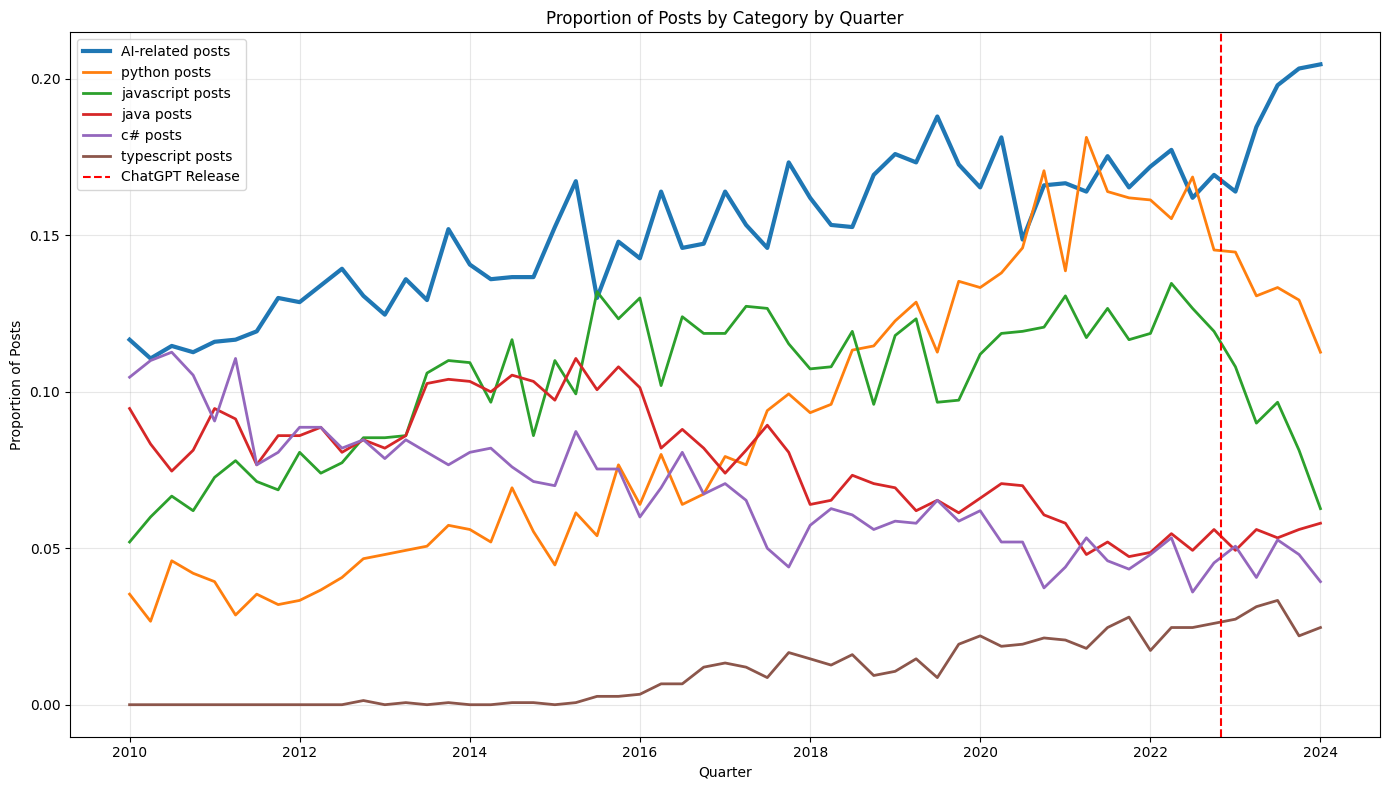

In [19]:
# Convert dates to quarters and get the start time of each quarter
df["quarter_start"] = pd.to_datetime(df["CreationDate"]).dt.to_period("Q").dt.start_time

ai_per_q = df[df["is_ai_content"]].groupby("quarter_start").size().rename("ai_posts")

total_per_q = df.groupby("quarter_start").size().rename("total_posts")

by_q = pd.concat([ai_per_q, total_per_q], axis=1).fillna(0)

by_q["ai_proportion"] = by_q["ai_posts"] / by_q["total_posts"]


for lang in language_tags:
    lang_col = f'has_{lang}_tag'
    lang_per_q = df[df[lang_col]].groupby("quarter_start").size().rename(f"{lang}_posts")
    by_q = pd.concat([by_q, lang_per_q], axis=1).fillna(0)
    by_q[f"{lang}_proportion"] = by_q[f"{lang}_posts"] / by_q["total_posts"]

plt.figure(figsize=(14, 8))

plt.plot(by_q.index, by_q["ai_proportion"], label="AI-related posts", linewidth=3)

top_langs = sorted(
    [(lang, by_q[f"{lang}_proportion"].iloc[-1]) for lang in language_tags],
    key=lambda x: x[1], 
    reverse=True
)[:5]
for lang, prop in top_langs:
    plt.plot(by_q.index, by_q[f"{lang}_proportion"], label=f"{lang} posts", linewidth=2)
plt.axvline(x=chatgpt_release, color='r', linestyle='--', label='ChatGPT Release')
plt.title('Proportion of Posts by Category by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Proportion of Posts')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('quarterly_trends.png')
plt.show()

In [21]:
test_df = df[df['CreationDate'] >= pd.to_datetime('2021-05-01')]
contingency = pd.crosstab(test_df['post_chatgpt'], test_df['is_ai_content'])
print("Contingency Table:")
print(contingency)


pre_chatgpt = test_df[test_df['post_chatgpt'] == False]
post_chatgpt = test_df[test_df['post_chatgpt'] == True]
pre_ai_count = pre_chatgpt['is_ai_content'].sum()
pre_total = len(pre_chatgpt)
pre_ai_prop = pre_ai_count / pre_total
post_ai_count = post_chatgpt['is_ai_content'].sum()
post_total = len(post_chatgpt)
post_ai_prop = post_ai_count / post_total

print("\nPre-ChatGPT (2021-05-01 - 2022-11-01) vs Post-ChatGPT (2022-11-01 - 2024-05-01) Analysis:")
print(f"Pre-ChatGPT posts: {pre_total}")
print(f"Post-ChatGPT posts: {post_total}")
print(f"Pre-ChatGPT AI proportion: {pre_ai_prop:.4f} ({pre_ai_count} AI posts)")
print(f"Post-ChatGPT AI proportion: {post_ai_prop:.4f} ({post_ai_count} AI posts)")
print(f"Absolute difference: {abs(post_ai_prop - pre_ai_prop):.4f}")
print(f"Relative change: {((post_ai_prop / pre_ai_prop) - 1) * 100:.2f}%")

#Chi-square test
chi2, p_chi2, dof, expected = stats.chi2_contingency(contingency)
print("\nChi-square Test:")
print(f"Chi-square value: {chi2:.4f}")
print(f"p-value: {p_chi2:.8f}")
print(f"Significant difference at α=0.05: {p_chi2 < 0.05}")

Contingency Table:
is_ai_content  False  True 
post_chatgpt               
False           7475   1525
True            6893   1607

Pre-ChatGPT (2021-05-01 - 2022-11-01) vs Post-ChatGPT (2022-11-01 - 2024-05-01) Analysis:
Pre-ChatGPT posts: 9000
Post-ChatGPT posts: 8500
Pre-ChatGPT AI proportion: 0.1694 (1525 AI posts)
Post-ChatGPT AI proportion: 0.1891 (1607 AI posts)
Absolute difference: 0.0196
Relative change: 11.58%

Chi-square Test:
Chi-square value: 11.3123
p-value: 0.00076996
Significant difference at α=0.05: True


In [25]:
questions_counts_per_month = pd.read_csv("repo/final-projects-stackoverflow-analysis-group/data/datasets/question_counts.csv")
questions_counts_per_month

,PostMonth,QuestionCount,Period
0,2016-01,182229,Pre-ChatGPT
1,2016-02,189568,Pre-ChatGPT
2,2016-03,202906,Pre-ChatGPT
3,2016-04,197947,Pre-ChatGPT
4,2016-05,190597,Pre-ChatGPT
...,...,...,...
94,2023-11,66717,Post-ChatGPT
95,2023-12,56607,Post-ChatGPT
96,2024-01,63183,Post-ChatGPT
97,2024-02,61682,Post-ChatGPT


/var/folders/_8/qyfw45yd7gbg3snksb6ws_380000gn/T/ipykernel_97733/1476982609.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


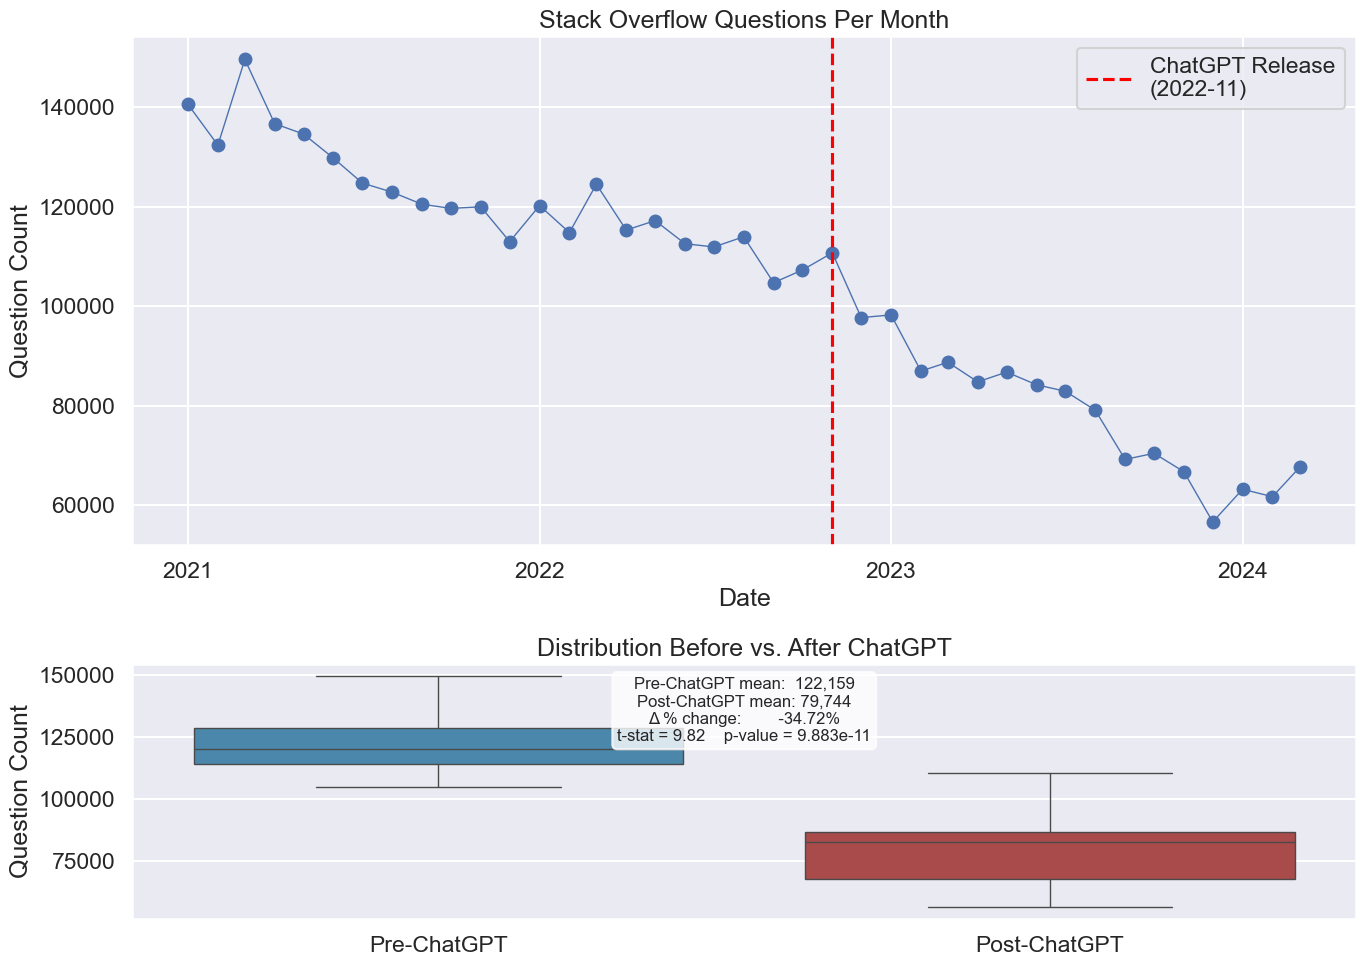

────────────────────────  t-test summary  ────────────────────────
Pre-ChatGPT  (n=22):  μ = 122,159
Post-ChatGPT (n=17): μ = 79,744
Percent change: -34.72%
t-statistic   : 9.82
p-value       : 9.883e-11
Statistically significant? YES


In [34]:
import matplotlib.dates as mdates
try:
    df = questions_counts_per_month.copy()
except NameError:
    df = pd.read_csv(
        "repo/final-projects-stackoverflow-analysis-group/data/datasets/question_counts.csv"
    )
    print("CSV re-loaded → df.shape =", df.shape)

# Ensure proper dtypes
df["PostMonth"] = pd.to_datetime(df["PostMonth"], format="%Y-%m")
df.sort_values("PostMonth", inplace=True)
cutoff = pd.Timestamp("2022-11-01")      # ChatGPT public release
df = df[df["PostMonth"] >= pd.Timestamp("2021-01-01")]
pre  = df[df["PostMonth"] <  cutoff]
post = df[df["PostMonth"] >= cutoff]
t_stat, p_val = stats.ttest_ind(
    pre["QuestionCount"],
    post["QuestionCount"],
    equal_var=False,
    nan_policy="omit",
)
pre_mean  = pre["QuestionCount"].mean()
post_mean = post["QuestionCount"].mean()
pct_change = 100 * (post_mean - pre_mean) / pre_mean
plt.style.use("ggplot")
sns.set_theme(context="talk")

fig, (ax_ts, ax_box) = plt.subplots(
    2, 1, figsize=(14, 10), gridspec_kw={"height_ratios": [2, 1]}
)

# --- 4a. Time-series plot
ax_ts.plot(df["PostMonth"], df["QuestionCount"], marker="o", lw=1)
ax_ts.axvline(cutoff, color="red", ls="--", label="ChatGPT Release\n(2022-11)")
ax_ts.set(
    title="Stack Overflow Questions Per Month",
    xlabel="Date", ylabel="Question Count"
)
ax_ts.xaxis.set_major_locator(mdates.YearLocator())
ax_ts.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax_ts.legend()

sns.boxplot(
    x="Period", y="QuestionCount",
    data=df, palette=["#3b8bba", "#ba3b3b"],
    ax=ax_box
)
ax_box.set(
    title="Distribution Before vs. After ChatGPT",
    xlabel="", ylabel="Question Count"
)

# Annotate statistics inside the 2nd axis
txt  = (
    f"Pre-ChatGPT mean:  {pre_mean:,.0f}\n"
    f"Post-ChatGPT mean: {post_mean:,.0f}\n"
    f"Δ % change:        {pct_change:+.2f}%\n"
    f"t-stat = {t_stat:0.2f}    p-value = {p_val:.4g}"
)
props = dict(boxstyle="round", facecolor="white", alpha=0.8)
ax_box.text(
    0.5, 0.95, txt, transform=ax_box.transAxes,
    ha="center", va="top", bbox=props, fontsize=12
)

plt.tight_layout()
plt.show()

print("────────────────────────  t-test summary  ────────────────────────")
print(f"Pre-ChatGPT  (n={len(pre)}):  μ = {pre_mean:,.0f}")
print(f"Post-ChatGPT (n={len(post)}): μ = {post_mean:,.0f}")
print(f"Percent change: {pct_change:+.2f}%")
print(f"t-statistic   : {t_stat:0.2f}")
print(f"p-value       : {p_val:.4g}")
alpha = 0.05
print("Statistically significant?" , "YES" if p_val < alpha else "NO")


──────────────── Interrupted time-series regression ────────────────
Formula      : QuestionCount ~ t_mon + post + t_post
Breakpoint   : 2022-11
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.384e+05   2108.058     65.634      0.000    1.34e+05    1.43e+05
t_mon      -1548.0718    172.294     -8.985      0.000   -1897.847   -1198.297
post        2.437e+04   7981.361      3.053      0.004    8166.235    4.06e+04
t_post     -1221.8306    306.571     -3.985      0.000   -1844.203    -599.459

Derived monthly slopes (questions / month)
  Pre-ChatGPT slope  :   -1548.1
  Post-ChatGPT slope :   -2769.9
  Δ slope (post-pre) :   -1221.8
-------------------------------------------------------------------



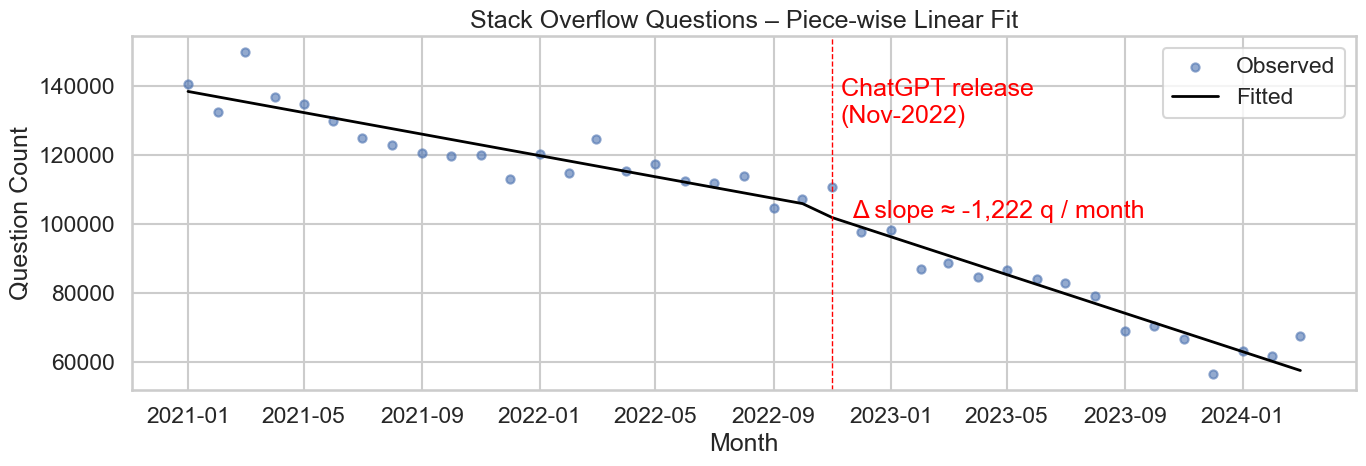

In [37]:
# ╔══════════════════════════════════════════════════════════════════════╗
# ║  Piece-wise linear regression around ChatGPT launch (Nov-2022)       ║
# ╚══════════════════════════════════════════════════════════════════════╝
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf


cutoff = pd.Timestamp("2022-11-01")   # ChatGPT public release
tmp = df.copy()
tmp["PostMonth"] = pd.to_datetime(tmp["PostMonth"])
tmp.sort_values("PostMonth", inplace=True)


days_per_month = 30.437               
tmp["t_mon"]   = (tmp["PostMonth"] - tmp["PostMonth"].min()).dt.days / days_per_month
tmp["post"]    = (tmp["PostMonth"] >= cutoff).astype(int)
tmp["t_post"]  = tmp["t_mon"] * tmp["post"]        
formula = "QuestionCount ~ t_mon + post + t_post"
model   = smf.ols(formula, data=tmp).fit()


β0, β1, β2, β3 = model.params
pre_slope   = β1                   #  questions / month BEFORE Nov-2022
post_slope  = β1 + β3              #  questions / month AFTER  Nov-2022
delta_slope = β3                   #  acceleration (post − pre)


print("\n──────────────── Interrupted time-series regression ────────────────")
print(f"Formula      : {formula}")
print(f"Breakpoint   : {cutoff:%Y-%m}")
print(model.summary().tables[1])   # coefficient table

print("\nDerived monthly slopes (questions / month)")
print(f"  Pre-ChatGPT slope  : {pre_slope:>9.1f}")
print(f"  Post-ChatGPT slope : {post_slope:>9.1f}")
print(f"  Δ slope (post-pre) : {delta_slope:>9.1f}")
print("-------------------------------------------------------------------\n")


sns.set_theme(style="whitegrid", context="talk")
fig, ax = plt.subplots(figsize=(14, 5))


ax.scatter(tmp["PostMonth"], tmp["QuestionCount"], s=35, alpha=.6,
           label="Observed")


tmp["pred"] = model.predict(tmp)
ax.plot(tmp["PostMonth"], tmp["pred"], color="black", lw=2, label="Fitted")


ax.axvline(cutoff, color="red", ls="--", lw=1)
ax.annotate("ChatGPT release\n(Nov-2022)", xy=(cutoff, tmp["QuestionCount"].max()*0.95),
            xytext=(6,0), textcoords="offset points", color="red", va="top")


ax.text(cutoff + pd.Timedelta(days=20),
        tmp["pred"].loc[tmp["post"]==1].iloc[0],
        f"Δ slope ≈ {delta_slope:,.0f} q / month",
        color="red")

ax.set(title="Stack Overflow Questions – Piece-wise Linear Fit",
       xlabel="Month", ylabel="Question Count")
ax.legend()
plt.tight_layout()
plt.show()